In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import random

file_list = [file for file in os.listdir() if file.endswith('csv')]

PREF = file_list.index('wine_data_preference.csv')
QLT_R = file_list.index('wine_quality_red.csv')
QLT_W = file_list.index('wine_quality_white.csv')
FREQ = file_list.index('wine_frequency.csv')
SALES = file_list.index('wine_data_sales.csv')
SIDE = file_list.index('wine_side.csv')
AREA = file_list.index('wine_area_province.csv')

df_list = list()
for file in file_list:
    try: df = pd.read_csv(file)
    except: df = pd.read_csv(file, encoding = 'cp949')
    df_list.append(df)
    

In [2]:
for idx, df in enumerate(df_list):
    print('='*40 + file_list[idx] + '='*40)
    print(f'{file_list[idx]} has {len(df)} entries...')
    print('-'*80)
    for category in df:
        print(f'{category} column\'s unique values: {df[category].unique()}\n{category} column\'s number of unique values: {len(df[category].unique())} values\n{category}\'s number of null values: {len(df[df[category].isnull() == True])}')
        print('-'*90)
    print('='*90)


========================================wine_data_preference.csv========================================
wine_data_preference.csv has 10000 entries...
--------------------------------------------------------------------------------
seq column's unique values: [1.000e+00 2.000e+00 3.000e+00 ... 9.998e+03 9.999e+03 1.000e+04]
seq column's number of unique values: 9984 values
seq's number of null values: 17
------------------------------------------------------------------------------------------
gender column's unique values: ['MALE' 'FEMALE' nan 'UNKNOW']
gender column's number of unique values: 4 values
gender's number of null values: 10
------------------------------------------------------------------------------------------
age column's unique values: ['50대' '30대' '40대' '60대 이상' '20대' '미상']
age column's number of unique values: 6 values
age's number of null values: 0
------------------------------------------------------------------------------------------
job column's unique values

prefer column's unique values: ['당도' '깊이감']
prefer column's number of unique values: 2 values
prefer's number of null values: 0
------------------------------------------------------------------------------------------
frequency column's unique values: [5 2 4 1 3 6 0 7]
frequency column's number of unique values: 8 values
frequency's number of null values: 0
------------------------------------------------------------------------------------------
wineFrequency column's unique values: [4 1 2 3 0 5]
wineFrequency column's number of unique values: 6 values
wineFrequency's number of null values: 0
------------------------------------------------------------------------------------------
========================================wine_area_province.csv========================================
wine_area_province.csv has 1 entries...
--------------------------------------------------------------------------------
Unnamed: 0 column's unique values: [0]
Unnamed: 0 column's number of unique values:

city column's unique values: ['청주시' '양천구' '연제구' '거제시' '광양시' '함안군' '강남구' '가평군' '해운대구' '포천시' '포항시 북구'
 '포항시 남구' '사하구' '강동구' '화성시' '곡성군' '기장군' '하동군' '해남군' '홍성군' '강북구' '평택시'
 '천안시' '안양시' '진구' '구례군' '마포구' '익산시' '충주시' '진천군']
city column's number of unique values: 30 values
city's number of null values: 0
------------------------------------------------------------------------------------------
purchase column's unique values: ["['D', 'F', 'D', 'G']" "['C', 'G', 'E']" "['B', 'F']" ...
 "['H', 'B', 'G', 'H', 'C']" "['H', 'H', 'H', 'D', 'F']"
 "['C', 'F', 'C', 'H', 'B']"]
purchase column's number of unique values: 10951 values
purchase's number of null values: 0
------------------------------------------------------------------------------------------
amount column's unique values: [100  60  30  15  75  55  65  50  45  35  20  25  40  85  10  70 105  90
  80  95 120 115 110 135 140 125 130 155 145 150 160 165]
amount column's number of unique values: 32 values
amount's number of null values: 0


In [3]:
df_tmp = df_list[PREF].copy()

In [4]:
df_tmp['seq'].head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: seq, dtype: float64

In [5]:
seq_idx = df_tmp.index.to_series() + 1
df_tmp['seq'].fillna(seq_idx, inplace = True)
df_tmp['seq'] = df_tmp['seq'].astype('int')
df_tmp.head()

,seq,gender,age,job,marital,province,city,choice
0,1,MALE,50대,중소기업직원,MARREID,부산시,해운대구,A
1,2,FEMALE,30대,연구원,SINGLE,경상도,하동군,D
2,3,FEMALE,30대,자영업,MARREID,부산시,사하구,B
3,4,FEMALE,40대,자영업,MARREID,부산시,사하구,D
4,5,FEMALE,40대,의사,MARREID,서울시,강남구,C


In [6]:
for df in [df_list[SIDE], df_list[FREQ]]:
    df_tmp = df_tmp.merge(df, on='seq', sort=True)
df_tmp.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1,prefer,frequency,wineFrequency
0,1,MALE,50대,중소기업직원,MARREID,부산시,해운대구,A,Annon,A,당도,5,4
1,2,FEMALE,30대,연구원,SINGLE,경상도,하동군,D,Roquefort,B,깊이감,2,1
2,3,FEMALE,30대,자영업,MARREID,부산시,사하구,B,Cheddar,G,깊이감,4,1
3,4,FEMALE,40대,자영업,MARREID,부산시,사하구,D,Gorgonzola,B,당도,1,1
4,5,FEMALE,40대,의사,MARREID,서울시,강남구,C,Gorgonzola,C,깊이감,1,1


In [7]:
for column in df_tmp.columns:
    print(f'{"="*40}{column} report{"="*40}')
    print(f'{column} null values: {len(df_tmp[df_tmp.isnull()[column] == True])}')
    try: print(f'{column} unique values: {df_tmp[column].unique()[:15] if len(list(df_tmp[column].unique())) >= 16 else df_tmp[column].unique()}')
    except: print(f'{column} unique values not printable')
    
    if len(df_tmp[df_tmp.isnull()[column] == True]): 
          for i in range(5): print('This column has null values!', end = ' ')
    print()

========================================seq report========================================
seq null values: 0
seq unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

========================================gender report========================================
gender null values: 10
gender unique values: ['MALE' 'FEMALE' nan 'UNKNOW']
This column has null values! This column has null values! This column has null values! This column has null values! This column has null values! 
========================================age report========================================
age null values: 0
age unique values: ['50대' '30대' '40대' '60대 이상' '20대' '미상']

========================================job report========================================
job null values: 0
job unique values: ['중소기업직원' '연구원' '자영업' '의사' '회사직원' '임시직' '학생' '벤처직원' '기자' '공무원' '변호사' '교수'
 '미상']

========================================marital report========================================
marital null values: 30
marital

In [8]:
for column in df_tmp.columns:
    for idx in df_tmp[column].index:
        if df_tmp.loc[idx, column] in ['미상', 'UNKNOW', 'UNKNOWN']:
            df_tmp.loc[idx, column] = np.NaN
df_tmp.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1,prefer,frequency,wineFrequency
0,1,MALE,50대,중소기업직원,MARREID,부산시,해운대구,A,Annon,A,당도,5,4
1,2,FEMALE,30대,연구원,SINGLE,경상도,하동군,D,Roquefort,B,깊이감,2,1
2,3,FEMALE,30대,자영업,MARREID,부산시,사하구,B,Cheddar,G,깊이감,4,1
3,4,FEMALE,40대,자영업,MARREID,부산시,사하구,D,Gorgonzola,B,당도,1,1
4,5,FEMALE,40대,의사,MARREID,서울시,강남구,C,Gorgonzola,C,깊이감,1,1


In [9]:
df_tmp[df_tmp.isnull()['job'] == True]

,seq,gender,age,job,marital,province,city,choice,side,choice1,prefer,frequency,wineFrequency
3471,3472,MALE,40대,NaN,MARREID,부산시,해운대구,F,Brie,E,깊이감,3,1
7964,7965,FEMALE,40대,NaN,MARREID,충청도,청주시,G,Annon,E,당도,1,1
8945,8946,FEMALE,40대,NaN,MARREID,충청도,청주시,H,Gorgonzola,G,깊이감,1,1
9098,9099,FEMALE,50대,NaN,MARREID,충청도,청주시,G,Ricotta,F,깊이감,2,1
9745,9746,MALE,50대,NaN,MARREID,경상도,함안군,D,Cheddar,E,깊이감,3,2


In [10]:
df_purged = df_tmp.copy()
df_faulty = pd.DataFrame(columns=df_purged.columns)

In [11]:
for column in df_purged.columns:
    tmp2 = df_purged[(df_purged[column] == '미상') | (df_purged.isnull()[column] == True) | (df_purged[column] == 'UNKNOW') | (df_purged[column] == 'UNKNOWN')]
    df_purged = df_purged[(df_purged[column] != '미상') & (df_purged.isnull()[column] == False) & (df_purged[column] != 'UNKNOW') & (df_purged[column] != 'UNKNOWN')]
    df_faulty = pd.concat([df_faulty, tmp2])

/home/hyuck/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [12]:
category_list = [category for category in df_purged.columns if df_purged[category].dtype == 'O']
dict_list = list()

for category in category_list:
    tmp_dict = dict()
        
    for idx, value in enumerate(df_purged[category].unique()):
        tmp_dict[value] = idx
    tmp_dict[np.NaN] = np.NaN    
    dict_list.append(tmp_dict)
    
    df_purged[category] = df_purged[category].apply((lambda x: tmp_dict[x]))

df_purged.head()

,seq,gender,age,job,marital,province,city,choice,side,choice1,prefer,frequency,wineFrequency
0,1,0,0,0,0,0,0,0,0,0,0,5,4
1,2,1,1,1,1,1,1,1,1,1,1,2,1
2,3,1,1,2,0,0,2,2,2,2,1,4,1
3,4,1,2,2,0,0,2,1,3,1,0,1,1
4,5,1,2,3,0,2,3,3,3,3,1,1,1


In [14]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [15]:
import matplotlib
import matplotlib.pyplot as plt

# 결측치, 이상치가 전혀 없는 데이터와 어느 한 column에라도 결측치 혹은 이상치가 있는 데이터를 나누어 준 후, 손쉬운 정제를 위해 이상치를 모두 np.NaN으로 나누어 주었음

In [16]:
df_purged_dummies = pd.get_dummies(df_purged)

In [17]:
scaler = StandardScaler()
df_purged_scaled = scaler.fit_transform(df_purged)

/home/hyuck/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/hyuck/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
df_purged_scaled = pd.DataFrame(df_purged_scaled, index=df_purged.index, columns=df_purged.columns)
df_purged_scaled.head(20)

,seq,gender,age,job,marital,province,city,choice,side,choice1,prefer,frequency,wineFrequency
0,-1.735000,-1.212903,-1.185428,-1.506141,-0.666789,-1.396566,-1.321272,-1.537446,-1.525443,-1.641351,-1.021459,2.252398,4.032460
1,-1.734653,0.824468,-0.464668,-1.200699,1.499725,-0.741905,-1.204358,-1.087393,-1.092086,-1.217728,0.978992,-0.416699,-0.500834
2,-1.734307,0.824468,-0.464668,-0.895258,-0.666789,-1.396566,-1.087445,-0.637341,-0.658729,-0.794105,0.978992,1.362699,-0.500834
3,-1.733960,0.824468,0.256091,-0.895258,-0.666789,-1.396566,-1.087445,-1.087393,-0.225372,-1.217728,-1.021459,-1.306398,-0.500834
4,-1.733613,0.824468,0.256091,-0.589817,-0.666789,-0.087244,-0.970531,-0.187289,-0.225372,-0.370482,0.978992,-1.306398,-0.500834
5,-1.733267,-1.212903,-1.185428,-0.284375,1.499725,-1.396566,-1.087445,0.262763,0.207985,-0.370482,0.978992,0.473000,1.010264
6,-1.732920,-1.212903,-0.464668,0.021066,-0.666789,-0.087244,-0.970531,0.712815,-1.525443,0.053141,-1.021459,-1.306398,-0.500834
7,-1.732574,0.824468,0.976850,0.021066,1.499725,-0.087244,-0.970531,-0.187289,-1.525443,0.476764,0.978992,0.473000,1.010264
8,-1.732227,-1.212903,1.697610,0.326507,-0.666789,-1.396566,-1.321272,-1.087393,0.641342,-1.641351,0.978992,-0.416699,-0.500834
9,-1.731880,0.824468,-1.185428,0.021066,-0.666789,0.567417,-0.853617,-1.087393,1.074699,-1.217728,-1.021459,-1.306398,-0.500834


Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

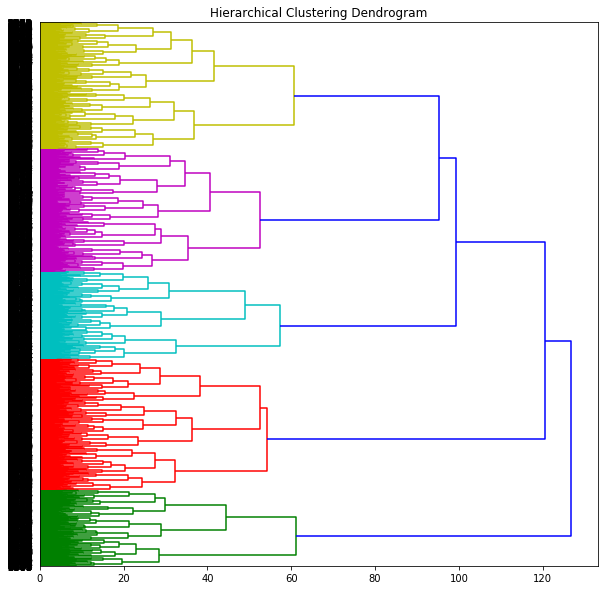

In [19]:
df_purged_scaled.drop('seq', axis = 1, inplace = True)

#['gender', 'marital', 'province', 'side']

df_purged_scaled_y = df_purged_scaled['gender']
df_purged_scaled_x = df_purged_scaled.drop('gender', axis = 1, inplace = False)

Z_ward = linkage(df_purged_scaled_x, method = 'ward', metric = 'euclidean')
Z_average = linkage(df_purged_scaled_x, method = 'average', metric = 'euclidean')
Z_Minkowski = linkage(df_purged_scaled_x, method = 'average', metric = 'minkowski')

plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

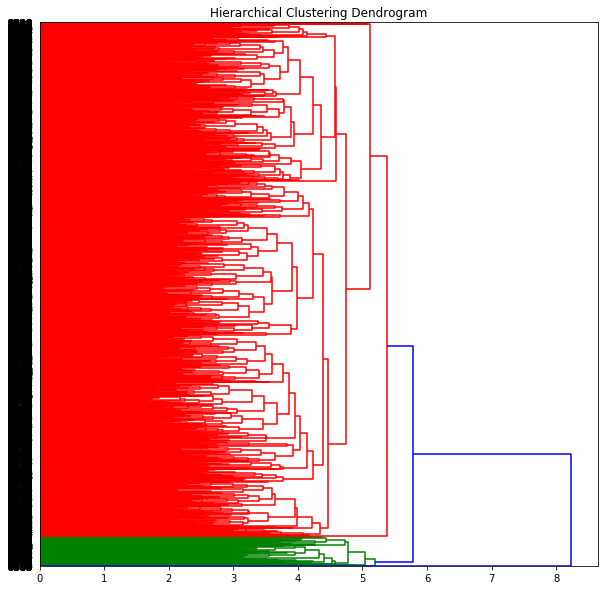

In [20]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_average, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

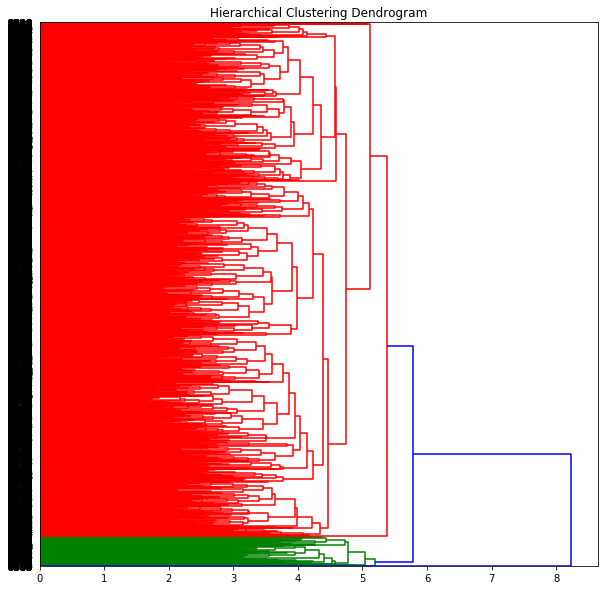

In [37]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_Minkowski, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')

# Z-Ward 방식이 이 중 군집 분석이 가장 잘되어있는 것으로 보인다.

In [44]:
cluster_heirarchical = fcluster(Z = Z_ward, t = 70, criterion = 'distance')
df_purged_scaled['ClusterHierarchical'] = cluster_heirarchical
df_purged_scaled.head()

,gender,age,job,marital,province,city,choice,side,choice1,prefer,frequency,wineFrequency,ClusterHierarchical
0,-1.212903,-1.185428,-1.506141,-0.666789,-1.396566,-1.321272,-1.537446,-1.525443,-1.641351,-1.021459,2.252398,4.032460,1
1,0.824468,-0.464668,-1.200699,1.499725,-0.741905,-1.204358,-1.087393,-1.092086,-1.217728,0.978992,-0.416699,-0.500834,2
2,0.824468,-0.464668,-0.895258,-0.666789,-1.396566,-1.087445,-0.637341,-0.658729,-0.794105,0.978992,1.362699,-0.500834,5
3,0.824468,0.256091,-0.895258,-0.666789,-1.396566,-1.087445,-1.087393,-0.225372,-1.217728,-1.021459,-1.306398,-0.500834,4
4,0.824468,0.256091,-0.589817,-0.666789,-0.087244,-0.970531,-0.187289,-0.225372,-0.370482,0.978992,-1.306398,-0.500834,5


In [45]:
ds_summary_hc = df_purged_scaled.groupby('ClusterHierarchical').agg(['mean'])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + '_' + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,gender_min,gender_mean,gender_max,age_min,age_mean,age_max,job_min,job_mean,job_max,...,choice1_max,prefer_min,prefer_mean,prefer_max,frequency_min,frequency_mean,frequency_max,wineFrequency_min,wineFrequency_mean,wineFrequency_max
0,1,-1.213,0.030,0.824,-1.185,0.046,1.698,-1.506,-0.104,1.854,...,1.324,-1.021,0.022,0.979,-0.417,1.386,4.032,-0.501,1.682,5.544
1,2,-1.213,-0.027,0.824,-1.185,-0.332,1.698,-1.506,0.019,1.854,...,1.324,-1.021,-0.009,0.979,-2.196,-0.059,3.142,-2.012,-0.111,2.521
2,3,-1.213,0.005,0.824,-1.185,1.486,1.698,-1.506,-0.131,1.854,...,1.324,-1.021,0.026,0.979,-2.196,-0.318,3.142,-2.012,-0.358,2.521
3,4,-1.213,0.015,0.824,-1.185,-0.380,1.698,-1.506,0.082,1.854,...,1.324,-1.021,-1.021,0.979,-2.196,-0.293,3.142,-2.012,-0.356,2.521
4,5,-1.213,-0.009,0.824,-1.185,-0.342,1.698,-1.506,0.055,1.854,...,1.324,-1.021,0.975,0.979,-2.196,-0.272,3.142,-2.012,-0.309,2.521


Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

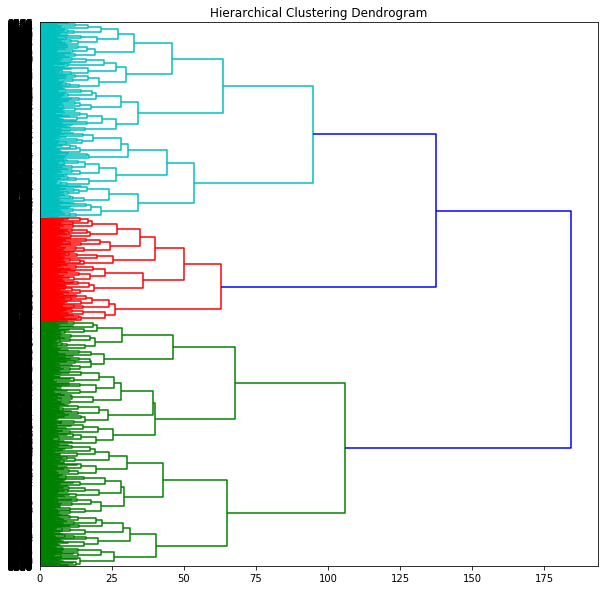

In [47]:
# df_purged_scaled.drop('seq', axis = 1, inplace = True)

#['marital', 'marital', 'province', 'side']

df_purged_scaled_y = df_purged_scaled['marital']
df_purged_scaled_x = df_purged_scaled.drop('marital', axis = 1, inplace = False)

Z_ward = linkage(df_purged_scaled_x, method = 'ward', metric = 'euclidean')
Z_average = linkage(df_purged_scaled_x, method = 'average', metric = 'euclidean')
Z_Minkowski = linkage(df_purged_scaled_x, method = 'average', metric = 'minkowski')

plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

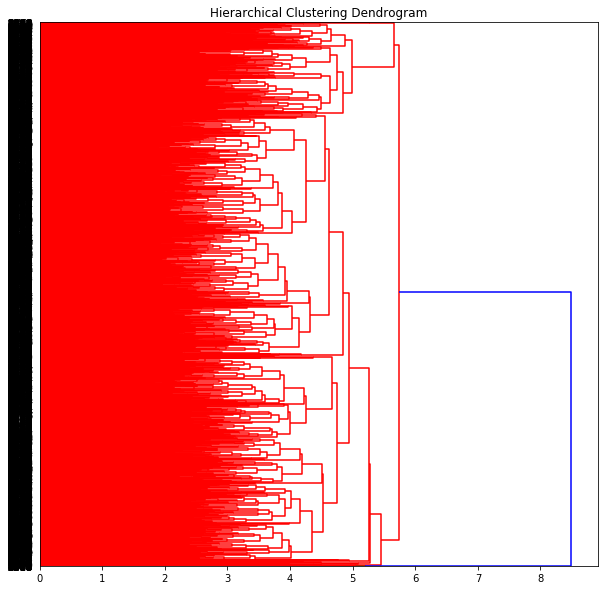

In [48]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_average, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

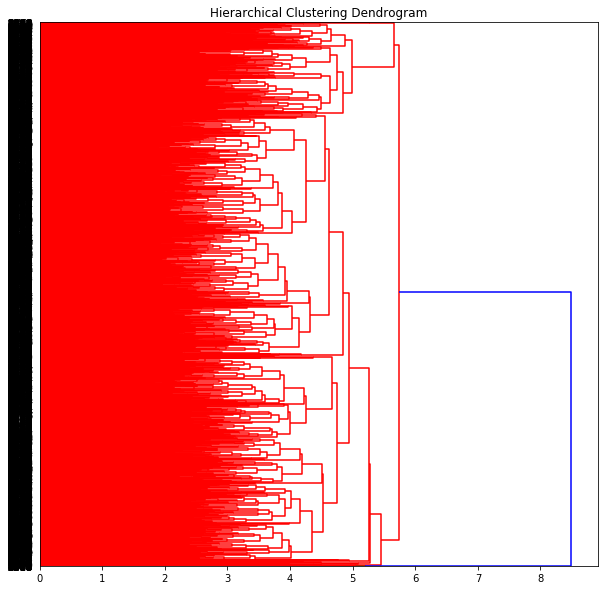

In [49]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_Minkowski, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')

In [50]:
cluster_heirarchical = fcluster(Z = Z_ward, t = 70, criterion = 'distance')
df_purged_scaled['ClusterHierarchical'] = cluster_heirarchical
df_purged_scaled.head()

,gender,age,job,marital,province,city,choice,side,choice1,prefer,frequency,wineFrequency,ClusterHierarchical
0,-1.212903,-1.185428,-1.506141,-0.666789,-1.396566,-1.321272,-1.537446,-1.525443,-1.641351,-1.021459,2.252398,4.032460,3
1,0.824468,-0.464668,-1.200699,1.499725,-0.741905,-1.204358,-1.087393,-1.092086,-1.217728,0.978992,-0.416699,-0.500834,5
2,0.824468,-0.464668,-0.895258,-0.666789,-1.396566,-1.087445,-0.637341,-0.658729,-0.794105,0.978992,1.362699,-0.500834,1
3,0.824468,0.256091,-0.895258,-0.666789,-1.396566,-1.087445,-1.087393,-0.225372,-1.217728,-1.021459,-1.306398,-0.500834,2
4,0.824468,0.256091,-0.589817,-0.666789,-0.087244,-0.970531,-0.187289,-0.225372,-0.370482,0.978992,-1.306398,-0.500834,1


In [51]:
ds_summary_hc = df_purged_scaled.groupby('ClusterHierarchical').agg(['mean'])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + '_' + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,gender_min,gender_mean,gender_max,age_min,age_mean,age_max,job_min,job_mean,job_max,...,choice1_max,prefer_min,prefer_mean,prefer_max,frequency_min,frequency_mean,frequency_max,wineFrequency_min,wineFrequency_mean,wineFrequency_max
0,1,-1.213,-0.013,0.824,-1.185,-0.403,1.698,-1.506,0.054,1.854,...,1.324,-1.021,0.971,0.979,-2.196,-0.268,3.142,-2.012,-0.298,2.521
1,2,-1.213,-0.000,0.824,-1.185,-0.386,1.698,-1.506,0.081,1.854,...,1.324,-1.021,-1.019,0.979,-2.196,-0.296,3.142,-2.012,-0.358,2.521
2,3,-1.213,0.004,0.824,-1.185,0.035,1.698,-1.506,-0.083,1.854,...,1.324,-1.021,0.029,0.979,-0.417,1.279,4.032,-0.501,1.505,5.544
3,4,-1.213,0.018,0.824,-1.185,1.595,1.698,-1.506,-0.147,1.854,...,1.324,-1.021,0.011,0.979,-2.196,-0.316,3.142,-2.012,-0.375,2.521
4,5,-1.213,-0.003,0.824,-1.185,-0.386,1.698,-1.506,0.040,1.854,...,1.324,-1.021,0.032,0.979,-2.196,-0.330,2.252,-2.012,-0.394,2.521


Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

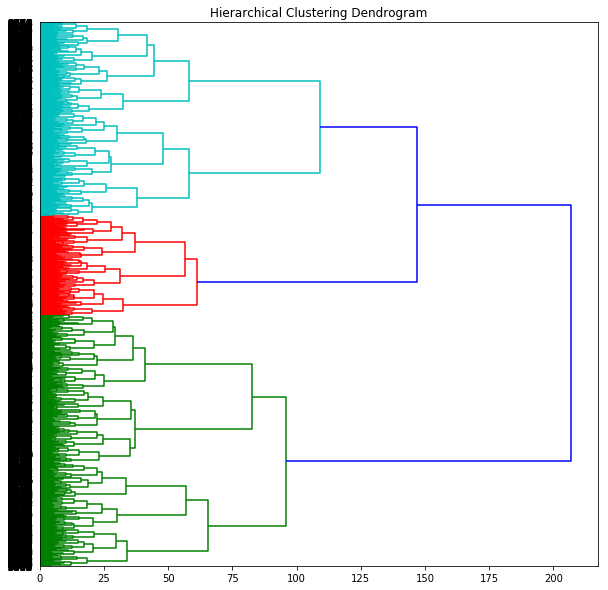

In [52]:
# df_purged_scaled.drop('seq', axis = 1, inplace = True)

#['province', 'marital', 'province', 'side']

df_purged_scaled_y = df_purged_scaled['province']
df_purged_scaled_x = df_purged_scaled.drop('province', axis = 1, inplace = False)

Z_ward = linkage(df_purged_scaled_x, method = 'ward', metric = 'euclidean')
Z_average = linkage(df_purged_scaled_x, method = 'average', metric = 'euclidean')
Z_Minkowski = linkage(df_purged_scaled_x, method = 'average', metric = 'minkowski')

plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

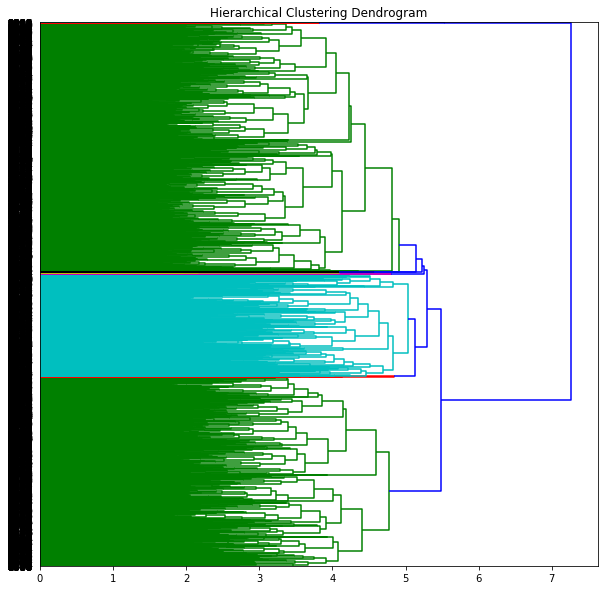

In [53]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_average, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

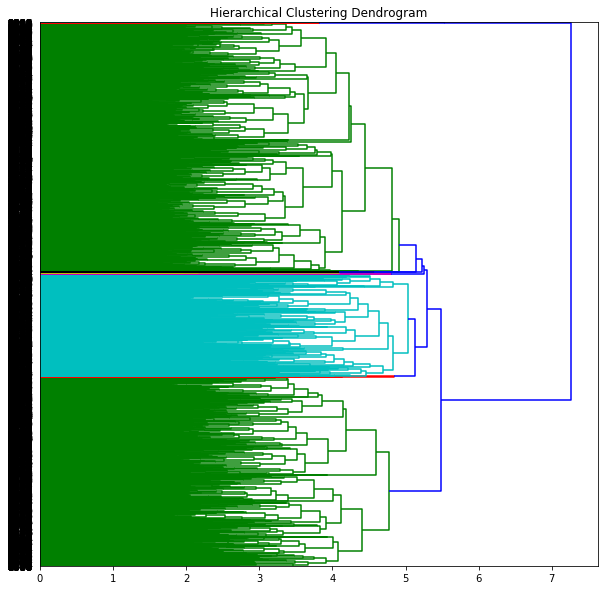

In [54]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_Minkowski, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')

In [55]:
cluster_heirarchical = fcluster(Z = Z_ward, t = 70, criterion = 'distance')
df_purged_scaled['ClusterHierarchical'] = cluster_heirarchical
df_purged_scaled.head()

,gender,age,job,marital,province,city,choice,side,choice1,prefer,frequency,wineFrequency,ClusterHierarchical
0,-1.212903,-1.185428,-1.506141,-0.666789,-1.396566,-1.321272,-1.537446,-1.525443,-1.641351,-1.021459,2.252398,4.032460,4
1,0.824468,-0.464668,-1.200699,1.499725,-0.741905,-1.204358,-1.087393,-1.092086,-1.217728,0.978992,-0.416699,-0.500834,5
2,0.824468,-0.464668,-0.895258,-0.666789,-1.396566,-1.087445,-0.637341,-0.658729,-0.794105,0.978992,1.362699,-0.500834,3
3,0.824468,0.256091,-0.895258,-0.666789,-1.396566,-1.087445,-1.087393,-0.225372,-1.217728,-1.021459,-1.306398,-0.500834,2
4,0.824468,0.256091,-0.589817,-0.666789,-0.087244,-0.970531,-0.187289,-0.225372,-0.370482,0.978992,-1.306398,-0.500834,3


In [56]:
ds_summary_hc = df_purged_scaled.groupby('ClusterHierarchical').agg(['mean'])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + '_' + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,gender_min,gender_mean,gender_max,age_min,age_mean,age_max,job_min,job_mean,job_max,...,choice1_max,prefer_min,prefer_mean,prefer_max,frequency_min,frequency_mean,frequency_max,wineFrequency_min,wineFrequency_mean,wineFrequency_max
0,1,-1.213,-1.209,0.824,-1.185,-0.365,1.698,-1.506,0.082,1.854,...,1.324,-1.021,-0.106,0.979,-2.196,-0.213,4.032,-2.012,-0.260,2.521
1,2,-1.213,0.815,0.824,-1.185,-0.419,1.698,-1.506,0.109,1.854,...,1.324,-1.021,-1.021,-1.021,-2.196,-0.291,3.142,-2.012,-0.309,2.521
2,3,-1.213,0.752,0.824,-1.185,-0.415,1.698,-1.506,0.039,1.854,...,1.324,0.979,0.979,0.979,-2.196,-0.267,3.142,-2.012,-0.290,2.521
3,4,-1.213,0.094,0.824,-1.185,0.084,1.698,-1.506,-0.123,1.854,...,1.324,-1.021,0.055,0.979,-0.417,1.287,4.032,-0.501,1.495,5.544
4,5,-1.213,-0.012,0.824,-1.185,-0.421,1.698,-1.506,0.044,1.854,...,1.324,-1.021,-0.026,0.979,-2.196,-0.342,2.252,-2.012,-0.394,2.521
5,6,-1.213,0.019,0.824,-1.185,1.473,1.698,-1.506,-0.128,1.854,...,1.324,-1.021,0.118,0.979,-2.196,-0.334,2.252,-2.012,-0.418,2.521


Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

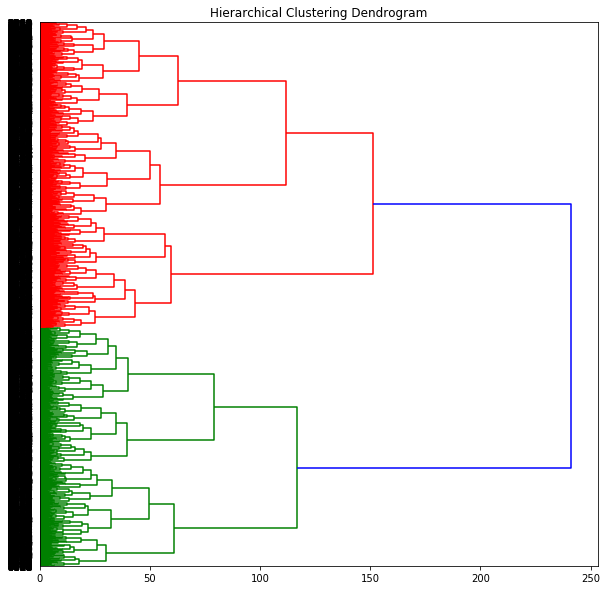

In [57]:
# df_purged_scaled.drop('seq', axis = 1, inplace = True)

#['side', 'marital', 'side', 'side']

df_purged_scaled_y = df_purged_scaled['side']
df_purged_scaled_x = df_purged_scaled.drop('side', axis = 1, inplace = False)

Z_ward = linkage(df_purged_scaled_x, method = 'ward', metric = 'euclidean')
Z_average = linkage(df_purged_scaled_x, method = 'average', metric = 'euclidean')
Z_Minkowski = linkage(df_purged_scaled_x, method = 'average', metric = 'minkowski')

plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

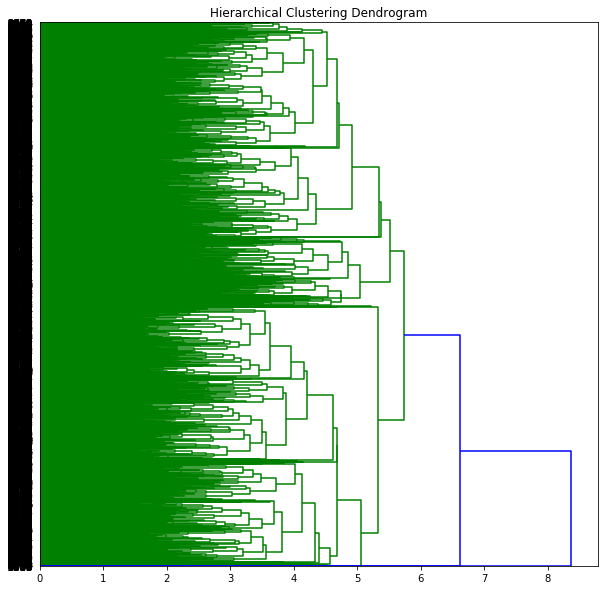

In [58]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_average, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

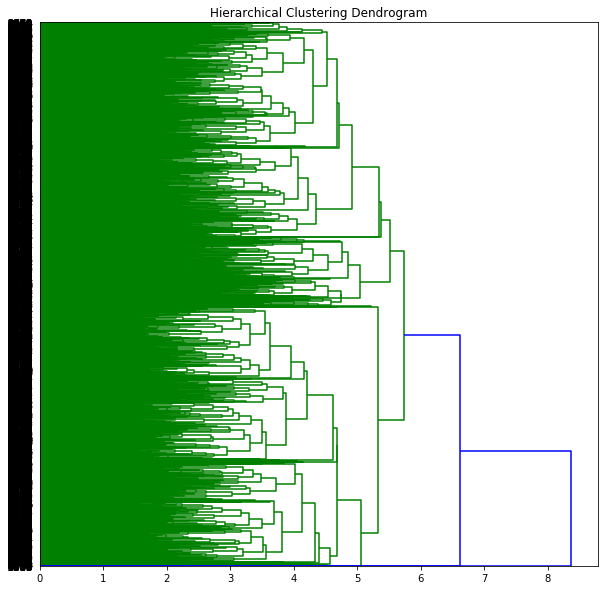

In [59]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

dendrogram(Z_Minkowski, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')

In [60]:
cluster_heirarchical = fcluster(Z = Z_ward, t = 70, criterion = 'distance')
df_purged_scaled['ClusterHierarchical'] = cluster_heirarchical
df_purged_scaled.head()

,gender,age,job,marital,province,city,choice,side,choice1,prefer,frequency,wineFrequency,ClusterHierarchical
0,-1.212903,-1.185428,-1.506141,-0.666789,-1.396566,-1.321272,-1.537446,-1.525443,-1.641351,-1.021459,2.252398,4.032460,4
1,0.824468,-0.464668,-1.200699,1.499725,-0.741905,-1.204358,-1.087393,-1.092086,-1.217728,0.978992,-0.416699,-0.500834,6
2,0.824468,-0.464668,-0.895258,-0.666789,-1.396566,-1.087445,-0.637341,-0.658729,-0.794105,0.978992,1.362699,-0.500834,2
3,0.824468,0.256091,-0.895258,-0.666789,-1.396566,-1.087445,-1.087393,-0.225372,-1.217728,-1.021459,-1.306398,-0.500834,3
4,0.824468,0.256091,-0.589817,-0.666789,-0.087244,-0.970531,-0.187289,-0.225372,-0.370482,0.978992,-1.306398,-0.500834,2


In [61]:
ds_summary_hc = df_purged_scaled.groupby('ClusterHierarchical').agg(['mean'])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + '_' + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,gender_mean,age_mean,job_mean,marital_mean,province_mean,city_mean,choice_mean,side_mean,choice1_mean,prefer_mean,frequency_mean,wineFrequency_mean
0,1,-1.212,-0.360,0.081,-0.646,0.009,-0.032,0.293,-0.001,-0.008,-0.106,-0.215,-0.262
1,2,0.786,-0.404,-0.006,-0.661,-0.054,-0.133,-0.007,-0.076,0.142,0.979,-0.472,-0.516
2,3,0.818,-0.429,0.111,-0.651,-0.015,0.075,-0.125,0.012,0.257,-1.021,-0.274,-0.307
3,4,0.181,0.051,-0.082,0.023,0.017,-0.012,-0.116,0.019,-0.036,0.128,1.215,1.442
4,5,0.008,1.469,-0.123,-0.016,0.051,0.125,-0.147,0.057,-0.288,0.117,-0.342,-0.436
5,6,-0.037,-0.423,0.039,1.500,-0.029,-0.038,0.053,-0.033,0.030,0.017,-0.334,-0.403


In [64]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = list()
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_purged_scaled_x)
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster':cluster_range, 'Error':clus_error})
ds_error.round(3)

,NumberofCluster,Error
0,1,138231.050
1,2,108486.942
2,3,96891.127
3,4,89922.880
4,5,83631.145
5,6,80252.889
6,7,78195.415
7,8,75589.373
8,9,73866.945
9,10,72200.550


In [66]:
clus = KMeans(5)
clus.fit(df_purged_scaled_x)
cluster_kmeans = [i +1 for i in clus.labels_]
df_purged_scaled['ClusterKmeans'] = cluster_kmeans
df_purged_scaled.head()

,gender,age,job,marital,province,city,choice,side,choice1,prefer,frequency,wineFrequency,ClusterHierarchical,ClusterKmeans
0,-1.212903,-1.185428,-1.506141,-0.666789,-1.396566,-1.321272,-1.537446,-1.525443,-1.641351,-1.021459,2.252398,4.032460,4,2
1,0.824468,-0.464668,-1.200699,1.499725,-0.741905,-1.204358,-1.087393,-1.092086,-1.217728,0.978992,-0.416699,-0.500834,6,1
2,0.824468,-0.464668,-0.895258,-0.666789,-1.396566,-1.087445,-0.637341,-0.658729,-0.794105,0.978992,1.362699,-0.500834,2,3
3,0.824468,0.256091,-0.895258,-0.666789,-1.396566,-1.087445,-1.087393,-0.225372,-1.217728,-1.021459,-1.306398,-0.500834,3,3
4,0.824468,0.256091,-0.589817,-0.666789,-0.087244,-0.970531,-0.187289,-0.225372,-0.370482,0.978992,-1.306398,-0.500834,2,3


In [67]:
ds_summary_km = df_purged_scaled.drop('ClusterHierarchical', axis = 1, inplace = False).groupby('ClusterKmeans').agg(['mean'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + '_' + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,gender_mean,age_mean,job_mean,marital_mean,province_mean,city_mean,choice_mean,side_mean,choice1_mean,prefer_mean,frequency_mean,wineFrequency_mean
0,1,-0.036,-0.402,0.041,1.485,0.001,-0.007,0.024,-0.020,0.000,-0.020,-0.230,-0.279
1,2,0.138,0.127,-0.144,-0.131,-0.016,-0.086,-0.140,0.015,-0.072,0.128,1.423,1.726
2,3,0.819,-0.435,0.073,-0.658,-0.024,-0.001,-0.061,-0.022,0.241,-0.059,-0.291,-0.341
3,4,-1.213,-0.346,0.082,-0.647,0.005,-0.034,0.291,-0.008,-0.028,-0.092,-0.222,-0.265
4,5,0.019,1.506,-0.130,-0.015,0.046,0.133,-0.139,0.058,-0.286,0.108,-0.326,-0.422


# 평균값으로 비교할 것